# Telemarketing example

A popular strategy in direct marketing is the telemarketing phonecalls; even if this kind of intervention is a low-cost alternative, the sucess of its implementation relies in the propper targeting of potential clients.

The following dataset provide information on the the success of telemarketing calls for selling a particular bank product. The dataset contains different features types. Namely:

Client information:
- age: Age of the potential client
- job: admin., blue- collar, entrepreneur, housemaid...
- marital_status: married, single, unknown
- education:basic.4y,basic.6y,basic.9y,high.school,illiterate,...

Client-Bank Relation
- default: The client has credit in default: no,yes,unknown 
- housing: The client has a housing loan contract: no,yes,unknown
- loan: categorical	The client has a personal loan: no,yes,unknown

Campain
- contact: Communication type (cellular,telephone)
- month: Last month contacted (jan, feb ,..., dec)
- day_of_week: Last contact day : (mon, tue,..., fri)  
- duration: Last contact duration (in seconds)
- campain:Number of contacts performed during this campaign
- pdays:of days that passed by after last contact (999 if the client was not previously contacted)
- previous: Number of contacts performed before this campaign
- poutcome: Outcome of the previous marketing campaign: failure,nonexistent,success

Economic indicators
- emp.var.rate: numerical	Employment variation rate in the last quarter 
- cons.price.idx: numerical	Consumer price index in the last month
- cons.conf.idx: numerical	Monthly consumer confidence index
- euribor3m: numerical	Dayly Euro Interbank Offered Rate
- nr.employed: numerical	Number of employees in the last quarter


## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('telemarketing_train.csv')


In [2]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
14995,51,admin.,married,basic.6y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
14996,53,housemaid,married,basic.4y,unknown,no,no,cellular,jul,tue,...,20,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
14997,41,management,married,unknown,no,yes,no,cellular,may,fri,...,5,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
14998,34,admin.,single,university.degree,no,yes,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
14999,51,admin.,single,university.degree,no,no,no,cellular,jun,fri,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,1


## Split Train/Test sets

In [5]:
X=df.iloc[:,:-1]
y=df['target']

In [6]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,73,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,327,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,188,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
3,32,management,single,university.degree,no,no,no,telephone,may,tue,237,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,32,technician,single,university.degree,no,yes,yes,cellular,nov,fri,1162,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8


In [7]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 321) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(10500, 20) (4500, 20)


## Split categorical/continuos variables

In [8]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [9]:
X_train_categorical=X_train.select_dtypes(include=['object'])
X_test_categorical=X_test.select_dtypes(include=['object'])

X_train_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
10019,retired,divorced,professional.course,no,no,no,cellular,oct,tue,nonexistent
11405,admin.,married,university.degree,unknown,yes,no,telephone,jun,mon,nonexistent
10536,blue-collar,married,basic.4y,no,yes,no,cellular,jul,thu,nonexistent
2899,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,nonexistent
7218,admin.,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent


In [10]:
X_train_numerical=X_train.select_dtypes(include=[np.number])
X_test_numerical=X_test.select_dtypes(include=[np.number])

X_train_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
10019,69,144,1,999,0,-3.4,92.431,-26.9,0.744,5017.5
11405,40,417,1,999,0,1.4,94.465,-41.8,4.865,5228.1
10536,30,347,5,999,0,1.4,93.918,-42.7,4.962,5228.1
2899,55,171,1,999,0,1.1,93.994,-36.4,4.859,5191.0
7218,53,142,1,999,0,1.1,93.994,-36.4,4.857,5191.0


## Categorical data

In [11]:
print(X_train_categorical.shape)
print(X_test_categorical.shape)

(10500, 10)
(4500, 10)


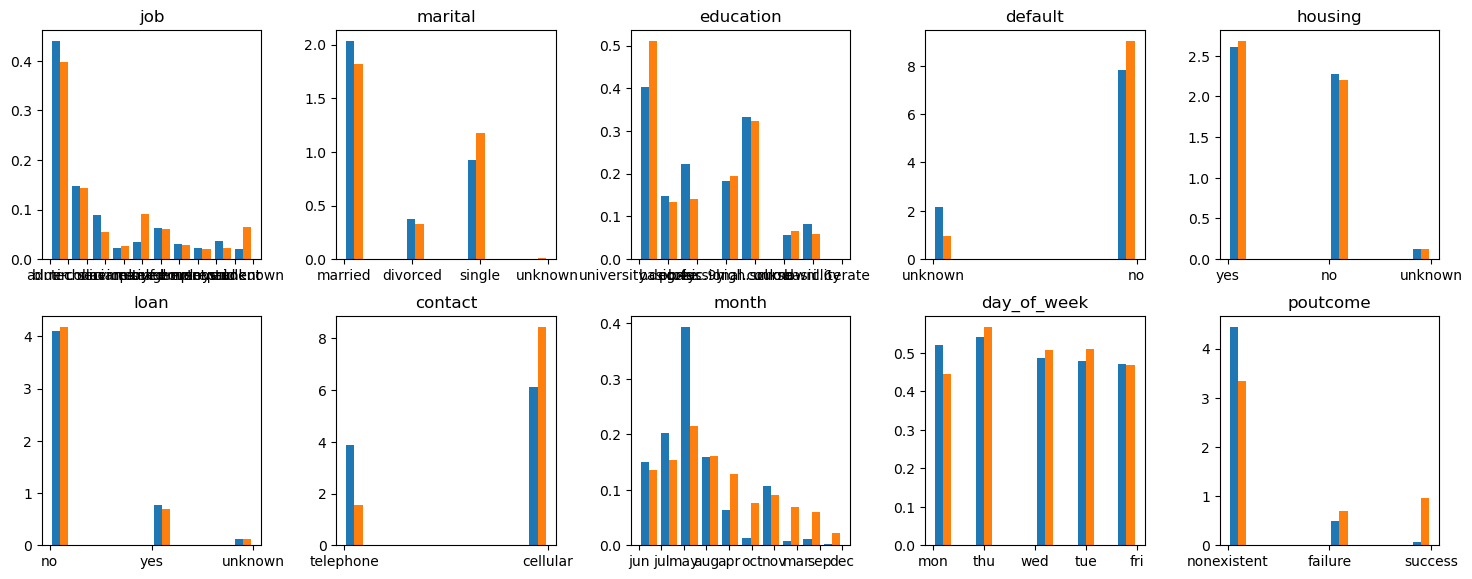

In [12]:
df_0=X_train_categorical[y_train==0] # records wih target==0
df_1=X_train_categorical[y_train==1] # records wih target==1


fig, axes = plt.subplots(2, 5,figsize=[15,6])
axes = axes.flatten()
fig.tight_layout(pad=2)

i=0
for x in X_train_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
3,32,management,single,university.degree,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,32,technician,single,university.degree,no,yes,yes,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51,admin.,married,basic.6y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
14996,53,housemaid,married,basic.4y,unknown,no,no,cellular,jul,tue,...,20,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
14997,41,management,married,unknown,no,yes,no,cellular,may,fri,...,5,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
14998,34,admin.,single,university.degree,no,yes,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


In [14]:
from sklearn.preprocessing import OneHotEncoder
selection_categorical=['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_categorical[selection_categorical])

OneHotEncoder(handle_unknown='ignore')

In [15]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['failure', 'nonexistent', 'success'], dtype=object)]

In [16]:
columns_dummies=encoder.get_feature_names_out()

In [17]:
dummies_train = encoder.transform(X_train_categorical[selection_categorical]).toarray()
dummies_test = encoder.transform(X_test_categorical[selection_categorical]).toarray()

dummies_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [18]:
dummies_train=pd.DataFrame(dummies_train,columns=columns_dummies)
dummies_test=pd.DataFrame(dummies_test,columns=columns_dummies)

In [19]:
dummies_train.shape

(10500, 41)

In [20]:
# Save the scaler
import pickle
pickle.dump(encoder, open('encoder.pkl', 'wb'))

## Numerical data

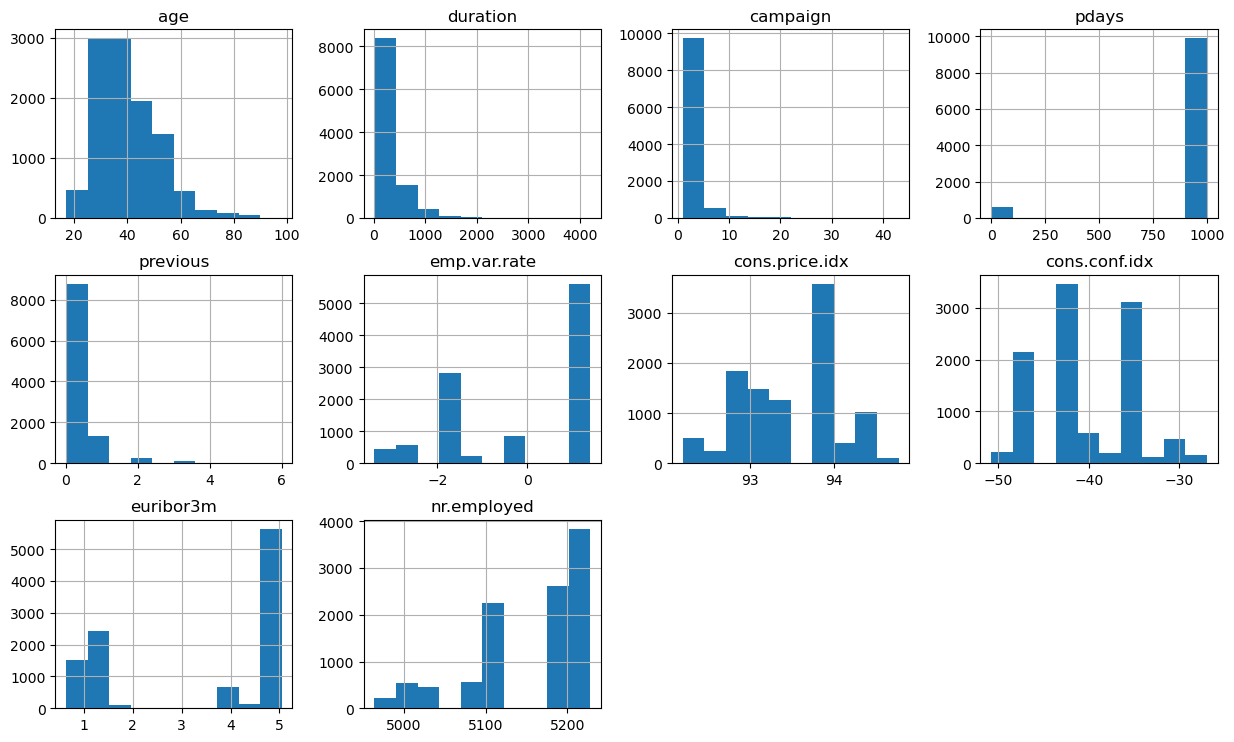

In [21]:
df_hist=X_train_numerical.hist(layout=(4,4), figsize=(15,12))

In [22]:
import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

X_train_numerical['logcampaign']=X_train_numerical['campaign'].apply(lambda x: math.log(x+1))
X_train_numerical['logduration']=X_train_numerical['duration'].apply(lambda x: math.log(x+1))
X_train_numerical['logprevious']=X_train_numerical['previous'].apply(lambda x: math.log(x+1))

In [23]:
X_train_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logcampaign,logduration,logprevious
10019,69,144,1,999,0,-3.4,92.431,-26.9,0.744,5017.5,0.693147,4.976734,0.0
11405,40,417,1,999,0,1.4,94.465,-41.8,4.865,5228.1,0.693147,6.035481,0.0
10536,30,347,5,999,0,1.4,93.918,-42.7,4.962,5228.1,1.791759,5.852202,0.0


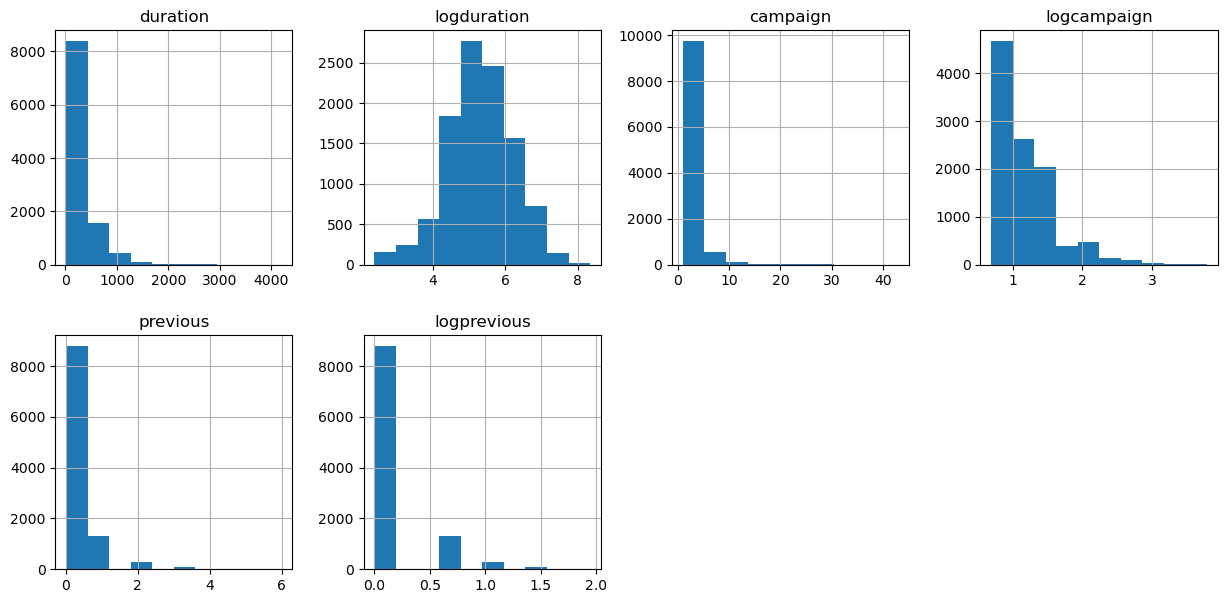

In [24]:
df_hist=X_train_numerical[['duration','logduration', 'campaign','logcampaign','previous','logprevious']].hist(layout=(2,4), figsize=(15,7))

In [25]:
X_train_numerical

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logcampaign,logduration,logprevious
10019,69,144,1,999,0,-3.4,92.431,-26.9,0.744,5017.5,0.693147,4.976734,0.000000
11405,40,417,1,999,0,1.4,94.465,-41.8,4.865,5228.1,0.693147,6.035481,0.000000
10536,30,347,5,999,0,1.4,93.918,-42.7,4.962,5228.1,1.791759,5.852202,0.000000
2899,55,171,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0.693147,5.147494,0.000000
7218,53,142,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.693147,4.962845,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12660,51,286,2,999,0,-0.1,93.200,-42.0,4.120,5195.8,1.098612,5.659482,0.000000
11667,49,336,4,999,0,1.4,93.918,-42.7,4.962,5228.1,1.609438,5.820083,0.000000
8808,49,63,4,999,0,1.4,93.918,-42.7,4.962,5228.1,1.609438,4.158883,0.000000
990,58,327,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0.693147,5.793014,0.000000


In [26]:
X_train_numerical.drop(columns=['duration','campaign','previous'],inplace=True)
X_train_numerical.columns

Index(['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'logcampaign', 'logduration',
       'logprevious'],
      dtype='object')

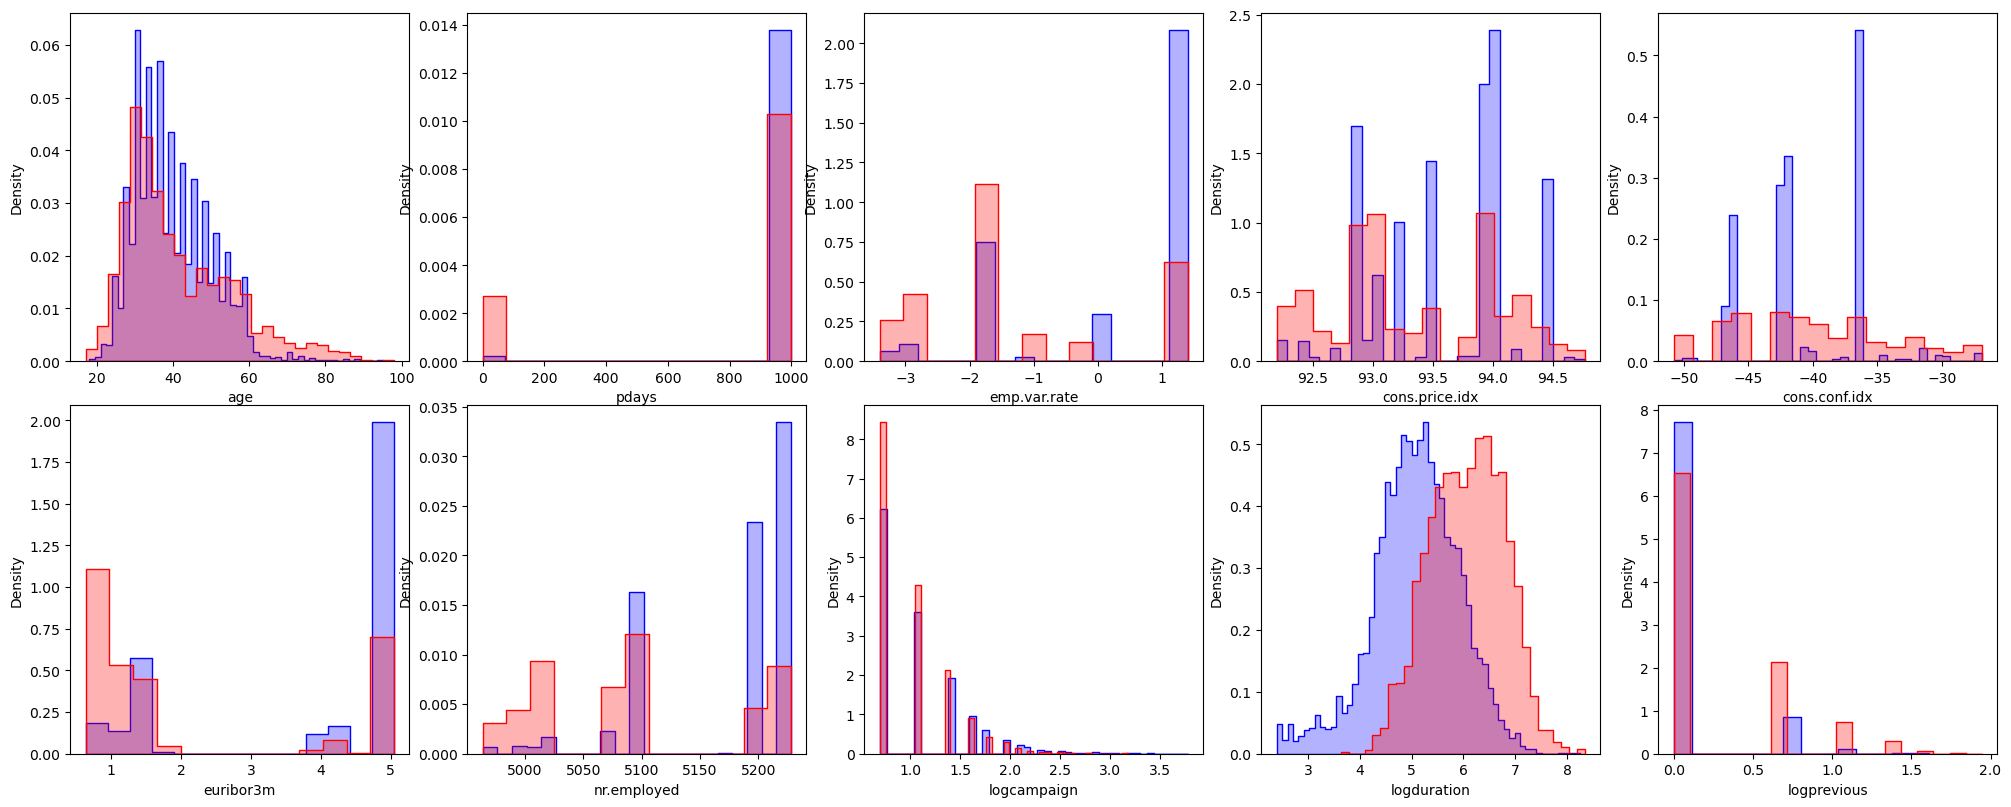

In [27]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


X0 = X_train_numerical[y_train==0]
X1 = X_train_numerical[y_train==1]

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(X_train_numerical.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

In [28]:
df_y_train=pd.DataFrame(y_train)
pd.concat([X_train_numerical,df_y_train],axis=1)

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logcampaign,logduration,logprevious,target
10019,69,999,-3.4,92.431,-26.9,0.744,5017.5,0.693147,4.976734,0.000000,1
11405,40,999,1.4,94.465,-41.8,4.865,5228.1,0.693147,6.035481,0.000000,0
10536,30,999,1.4,93.918,-42.7,4.962,5228.1,1.791759,5.852202,0.000000,0
2899,55,999,1.1,93.994,-36.4,4.859,5191.0,0.693147,5.147494,0.000000,0
7218,53,999,1.1,93.994,-36.4,4.857,5191.0,0.693147,4.962845,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
12660,51,999,-0.1,93.200,-42.0,4.120,5195.8,1.098612,5.659482,0.000000,0
11667,49,999,1.4,93.918,-42.7,4.962,5228.1,1.609438,5.820083,0.000000,0
8808,49,999,1.4,93.918,-42.7,4.962,5228.1,1.609438,4.158883,0.000000,0
990,58,999,1.4,93.444,-36.1,4.966,5228.1,0.693147,5.793014,0.000000,0


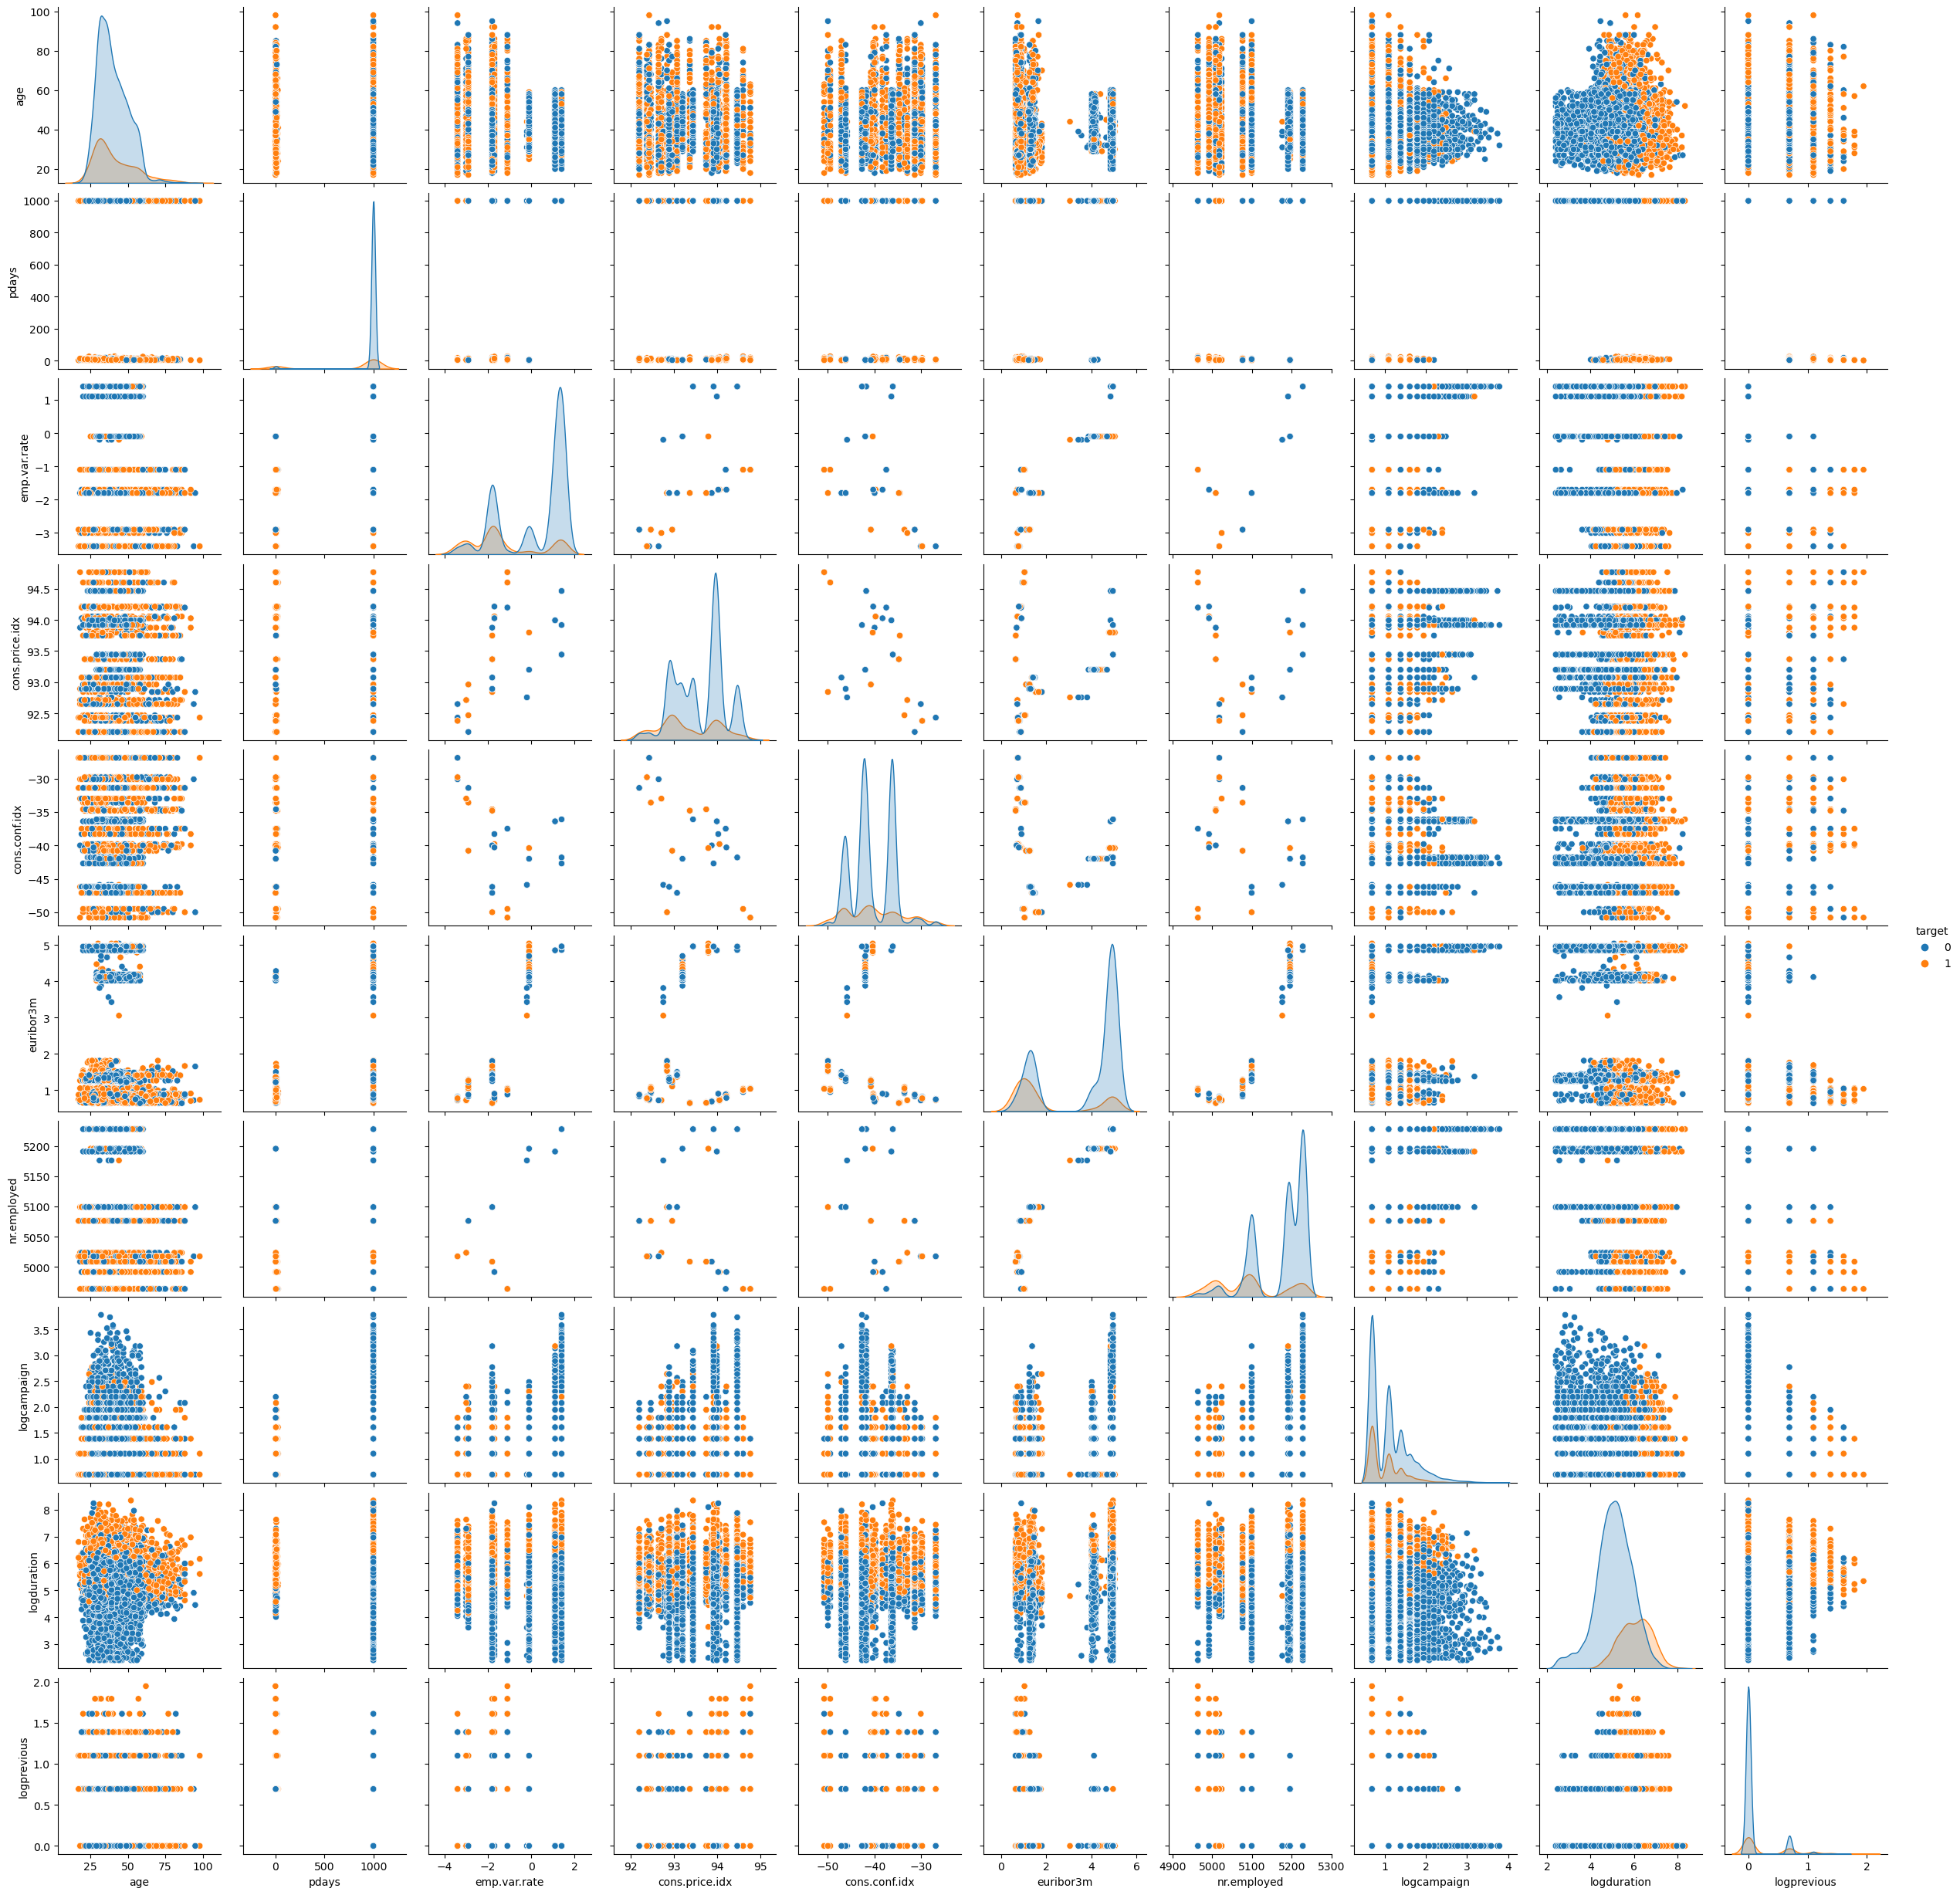

In [29]:
sns.pairplot(pd.concat([X_train_numerical,df_y_train],axis=1), hue='target')

In [30]:
X_test_numerical['logcampaign']=X_test_numerical['campaign'].apply(lambda x: math.log(x+1))
X_test_numerical['logduration']=X_test_numerical['duration'].apply(lambda x: math.log(x+1))
X_test_numerical['logprevious']=X_test_numerical['previous'].apply(lambda x: math.log(x+1))

In [31]:
X_test_numerical.drop(columns=['duration','campaign','previous'],inplace=True)
X_test_numerical.columns

Index(['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'logcampaign', 'logduration',
       'logprevious'],
      dtype='object')

In [32]:
X_train_numerical.columns

Index(['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'logcampaign', 'logduration',
       'logprevious'],
      dtype='object')

## Standarize

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler().fit(X_train_numerical) # No target
X_train_numerical_scaled=pd.DataFrame(scaler.transform(X_train_numerical))
X_test_numerical_scaled=pd.DataFrame(scaler.transform(X_test_numerical))

X_train_numerical_scaled.columns = X_train_numerical.columns
X_test_numerical_scaled.columns = X_test_numerical.columns


In [35]:
X_test_numerical_scaled

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logcampaign,logduration,logprevious
0,1.066853,0.250503,0.915658,1.533186,-0.278185,0.806739,0.909343,0.596132,-0.390138,-0.421011
1,0.887388,0.250503,0.733942,0.748745,0.828481,0.806188,0.436779,-0.005480,-0.985876,-0.421011
2,-0.368870,0.250503,0.915658,1.533186,-0.278185,0.859627,0.909343,-0.853405,-0.446102,-0.421011
3,-0.189404,0.250503,0.915658,-0.167268,0.889962,0.862381,0.909343,-0.005480,-0.016997,-0.421011
4,0.438724,0.250503,-1.022645,-1.084947,-1.179913,-1.167732,-0.733803,-0.005480,-0.801242,1.784240
...,...,...,...,...,...,...,...,...,...,...
4495,-0.368870,0.250503,0.915658,1.533186,-0.278185,0.860178,0.909343,-0.853405,-0.251200,-0.421011
4496,0.977120,0.250503,0.733942,0.748745,0.828481,0.803985,0.436779,-0.005480,-0.230784,-0.421011
4497,-0.099672,0.250503,0.915658,0.622169,-0.462629,0.859076,0.909343,0.596132,1.356697,-0.421011
4498,-0.727800,0.250503,0.915658,1.533186,-0.278185,0.862932,0.909343,-0.005480,1.277569,-0.421011


In [36]:
# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))


<AxesSubplot: >

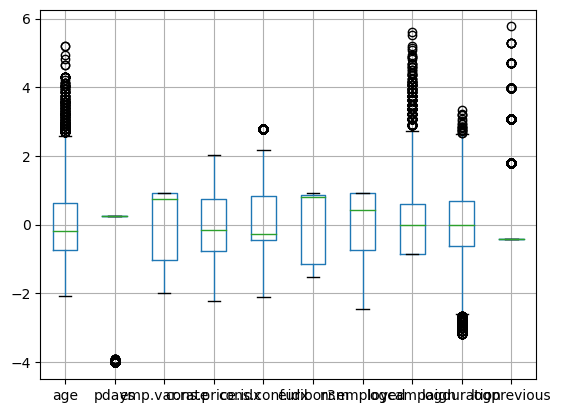

In [37]:
X_train_numerical_scaled.boxplot()

In [38]:
## Final datasets

In [39]:
X_train=pd.concat([dummies_train,X_train_numerical_scaled], axis=1)
X_test=pd.concat([dummies_test,X_test_numerical_scaled], axis=1)


In [40]:
X_train

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logcampaign,logduration,logprevious
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.592308,0.250503,-1.991796,-1.854399,2.775393,-1.463573,-1.773189,-0.853405,-0.359392,-0.421011
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.009939,0.250503,0.915658,1.533186,-0.278185,0.806739,0.909343,-0.853405,0.804242,-0.421011
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.907265,0.250503,0.915658,0.622169,-0.462629,0.860178,0.909343,1.444056,0.602806,-0.421011
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.336051,0.250503,0.733942,0.748745,0.828481,0.803434,0.436779,-0.853405,-0.171715,-0.421011
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.156585,0.250503,0.733942,0.748745,0.828481,0.802332,0.436779,-0.853405,-0.374657,-0.421011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.977120,0.250503,0.007078,-0.573645,-0.319173,0.396309,0.497920,-0.005480,0.390994,-0.421011
10496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.797655,0.250503,0.915658,0.622169,-0.462629,0.860178,0.909343,1.062778,0.567505,-0.421011
10497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.797655,0.250503,0.915658,0.622169,-0.462629,0.860178,0.909343,1.062778,-1.258265,-0.421011
10498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.605249,0.250503,0.915658,-0.167268,0.889962,0.862381,0.909343,-0.853405,0.537754,-0.421011


## Models

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import time

In [42]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    
    tic = time.perf_counter()
    gs = gs.fit(X_train, y_train)
    toc = time.perf_counter()

    print("f1_train: %f using %s in %.3f seconds" % (gs.best_score_, gs.best_params_,toc - tic))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("           train    test ") 
    print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))



In [43]:
hyperp_search(classifier,parameters)

f1_train: 0.617999 using {'n_neighbors': 30} in 15.961 seconds
           train    test 
f1         0.660    0.619
precision  0.765    0.731

[[3262  204]
 [ 479  555]]


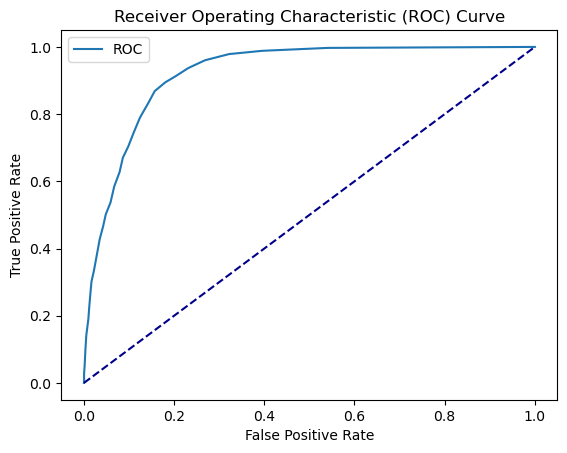

AUC: 0.92


In [44]:
model_knn = KNeighborsClassifier(n_neighbors=30)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [45]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}

hyperp_search(classifier,parameters)


f1_train: 0.737328 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20} in 3.152 seconds
           train    test 
f1         0.752    0.736
precision  0.748    0.725

[[3173  293]
 [ 261  773]]


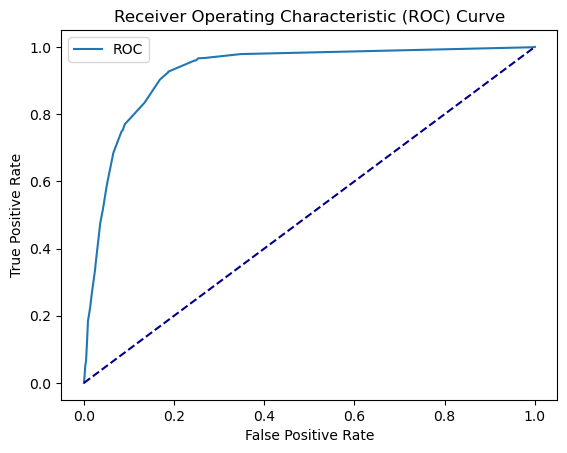

AUC: 0.93


In [46]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [47]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)


|--- nr.employed <= -0.88
|   |--- logduration <= -0.25
|   |   |--- pdays <= -3.98
|   |   |   |--- logcampaign <= 0.30
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logcampaign >  0.30
|   |   |   |   |--- class: 0
|   |   |--- pdays >  -3.98
|   |   |   |--- logduration <= -1.03
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logduration >  -1.03
|   |   |   |   |--- truncated branch of depth 2
|   |--- logduration >  -0.25
|   |   |--- pdays <= -3.95
|   |   |   |--- logduration <= 0.20
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logduration >  0.20
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- pdays >  -3.95
|   |   |   |--- logduration <= 0.31
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logduration >  0.31
|   |   |   |   |--- truncated branch of depth 2
|--- nr.employed >  -0.88
|   |--- logduration <= 0.94
|   |   |--- cons.conf.idx <= -1.27
|   |   |   |--- euribor3m <= -1.03
|   

In [48]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5190424374319914
f1_test:  0.5190424374319914
[[3139  327]
 [ 557  477]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3466
           1       0.59      0.46      0.52      1034

    accuracy                           0.80      4500
   macro avg       0.72      0.68      0.70      4500
weighted avg       0.79      0.80      0.79      4500



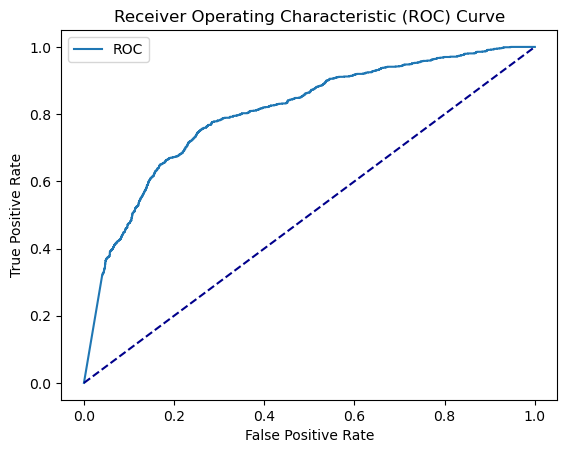

AUC: 0.80


In [49]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [50]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)


f1_train: 0.710848 using {'C': 10, 'max_iter': 1000} in 1.076 seconds
           train    test 
f1         0.719    0.715
precision  0.765    0.747

[[3225  241]
 [ 324  710]]


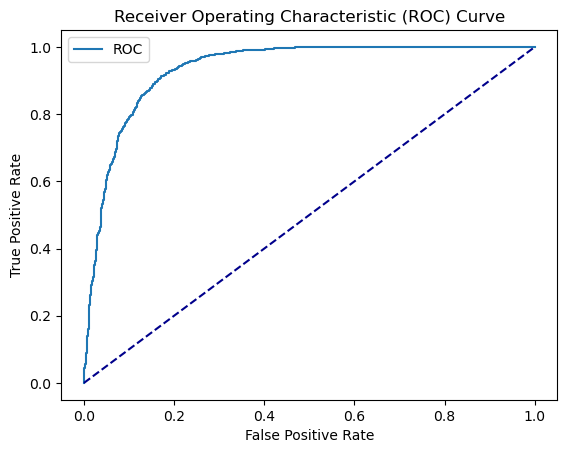

AUC: 0.93


In [51]:
model = LogisticRegression(C=10, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


In [52]:
model.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

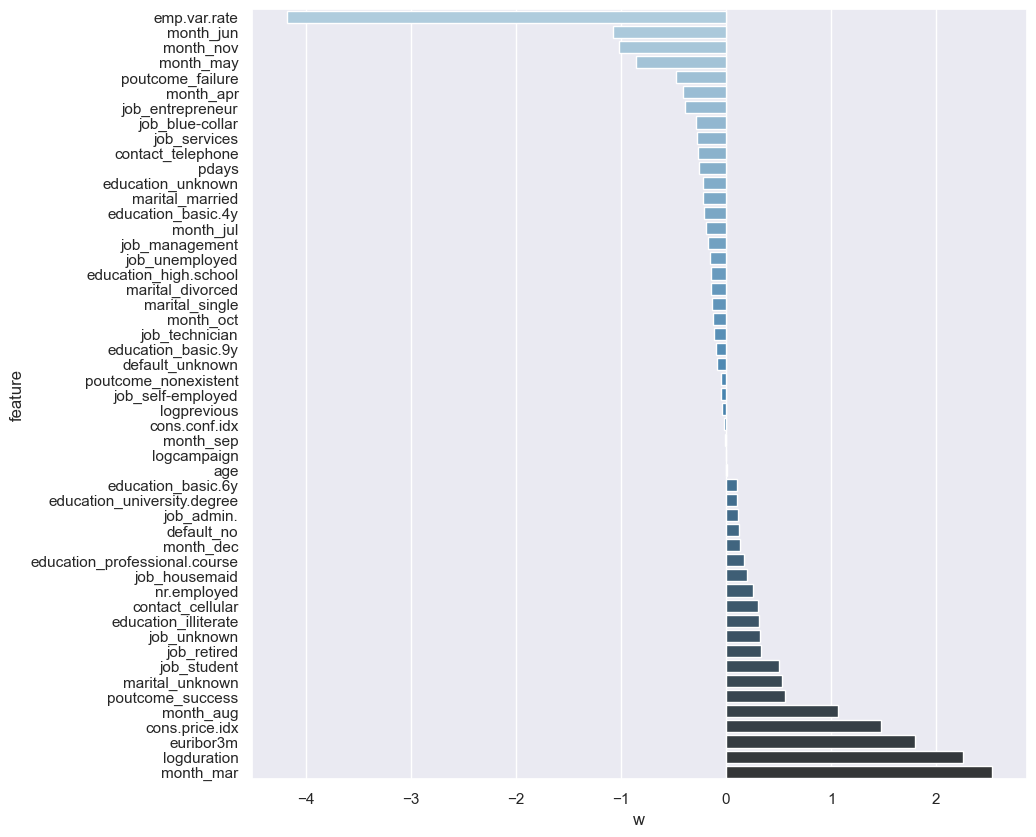

In [53]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})


In [54]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 0.717233 using {'C': 100, 'kernel': 'linear'} in 89.560 seconds
           train    test 
f1         0.729    0.721
precision  0.760    0.748

[[3223  243]
 [ 314  720]]


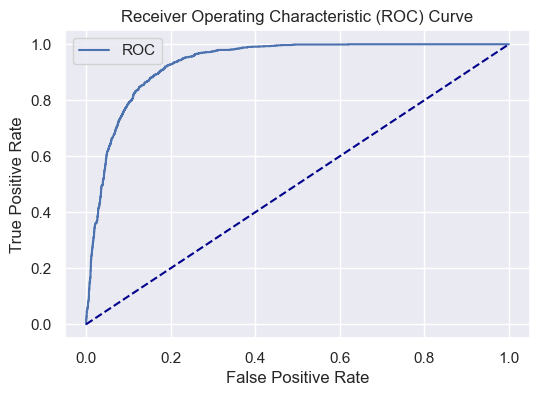

AUC: 0.93


In [55]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [56]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.734032 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000} in 37.683 seconds
           train    test 
f1         0.783    0.737
precision  0.766    0.714

[[3150  316]
 [ 247  787]]


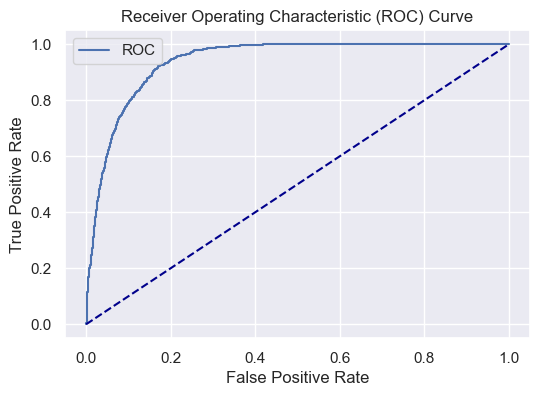

AUC: 0.94


In [57]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

f1_train: 0.689566 using {'learning_rate': 0.5, 'n_estimators': 30} in 1.160 seconds
           train    test 
f1         0.701    0.703
precision  0.770    0.762

[[3255  211]
 [ 359  675]]


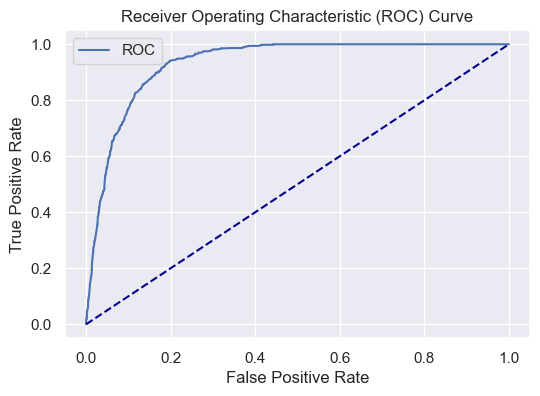

AUC: 0.93


In [58]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {"n_estimators":[10,30],
            "learning_rate":[0.5,1.0]}

hyperp_search(classifier,parameters)

model_Ada=AdaBoostClassifier(n_estimators=30, learning_rate=0.5)

fpr7,tpr7=roc(model_Ada,X_train,y_train,X_test,y_test)

f1_train: 0.659483 using {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100} in 10.282 seconds
           train    test 
f1         0.683    0.638
precision  0.808    0.762

[[3289  177]
 [ 467  567]]


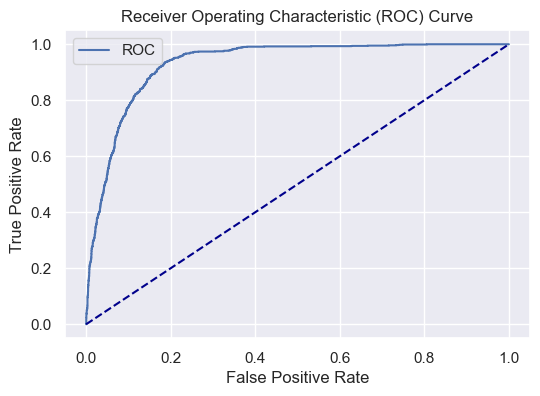

AUC: 0.93


In [59]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
param_RF = {'criterion': ['entropy','gini'],
              'n_estimators' : [50,100,200],
              'max_depth': [5,6,7]}

hyperp_search(RF,param_RF)

model_RF=RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=7)

fpr8,tpr8=roc(model_RF,X_train,y_train,X_test,y_test)

<AxesSubplot: >

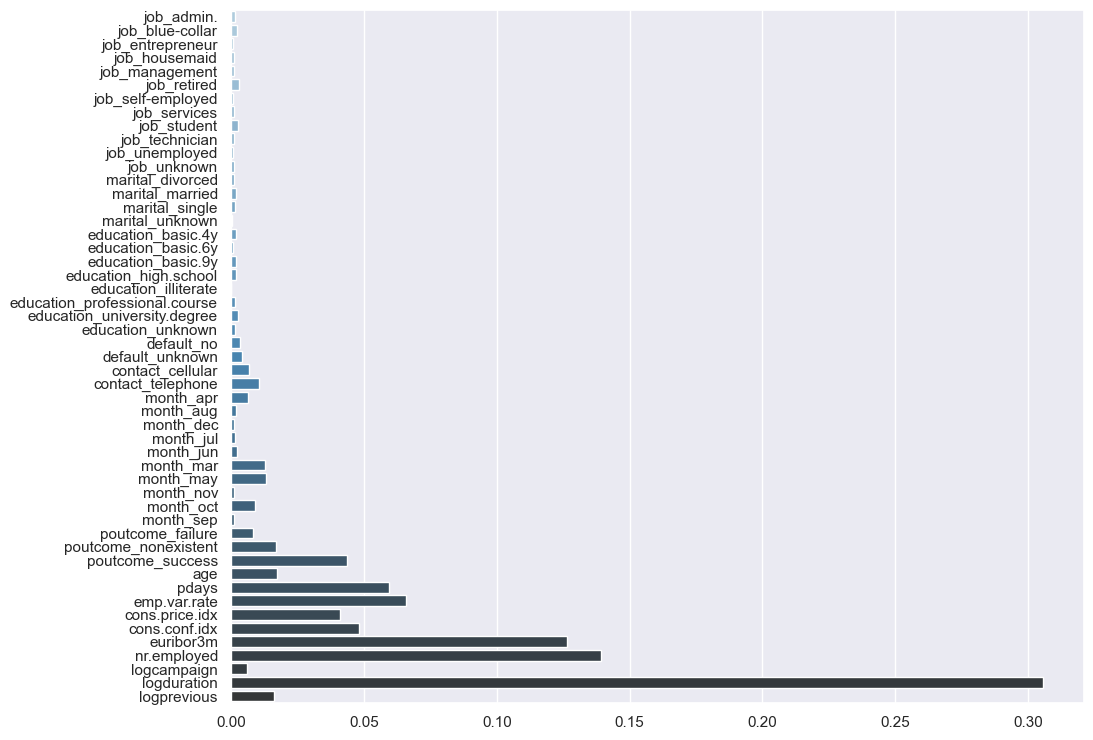

In [60]:
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(y=X_train.columns, x=model_RF.feature_importances_, palette="Blues_d", orient="h")

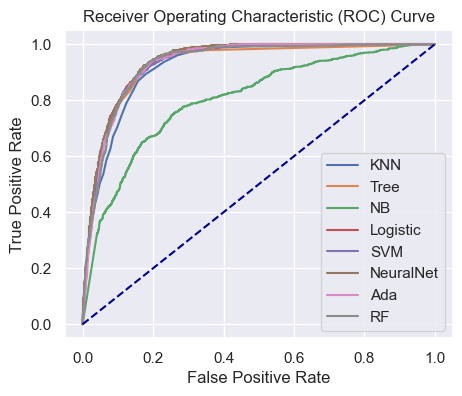

In [61]:
sns.set(rc={'figure.figsize':(5,4)})
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "Ada")
plt.plot(fpr8, tpr8, label= "RF")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Save the model

In [62]:
import pickle

In [63]:
pickle.dump(model_tree, open('tree_model.pkl', 'wb'))

## Making predictions

In [64]:
import pickle
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [65]:
# load scaler modand el
loaded_encoder = pickle.load(open('encoder.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('tree_model.pkl', 'rb'))

In [66]:
df_new = pd.read_csv('telemarketing_pred_withtarget.csv')

In [67]:
#pd.options.mode.chained_assignment = None  # default='warn'

df_new_categorical=df_new.select_dtypes(include=['object'])

# Categorical
selection_categorical=['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']
dummies_new = encoder.transform(df_new[selection_categorical]).toarray()

columns_dummies=encoder.get_feature_names_out()
dummies_new =pd.DataFrame(dummies_new,columns=columns_dummies)

    
# Numerical
df_new_numerical=df_new.select_dtypes(include=[np.number])
df_new_numerical.loc[:,'logcampaign']=df_new_numerical['campaign'].apply(lambda x: math.log(x+1))
df_new_numerical.loc[:,'logduration']=df_new_numerical['duration'].apply(lambda x: math.log(x+1))
df_new_numerical.loc[:,'logprevious']=df_new_numerical['previous'].apply(lambda x: math.log(x+1))

# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!

selection_numerical=['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'logcampaign', 'logduration','logprevious'] # no target
df_new_selection_numerical=df_new_numerical[selection_numerical]
scaled_df_new = pd.DataFrame(loaded_scaler.transform(df_new_selection_numerical))
scaled_df_new.columns = df_new_selection_numerical.columns

# Feature selection

X2=pd.concat([dummies_new,scaled_df_new], axis = 1)


In [68]:
X2

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logcampaign,logduration,logprevious
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.176463,0.250503,-1.022645,-1.084947,-1.179913,-1.175996,-0.733803,1.062778,0.152425,1.784240
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.458602,0.250503,-1.022645,-0.781830,-1.364357,-1.099419,-0.733803,-0.853405,0.113688,-0.421011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.099672,0.250503,0.733942,0.748745,0.828481,0.801781,0.436779,0.596132,0.520870,-0.421011
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.548335,0.250503,0.915658,-0.167268,0.889962,0.861830,0.909343,0.596132,-1.175589,-0.421011
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.977120,0.250503,-1.022645,-1.084947,-1.179913,-1.157816,-0.733803,-0.853405,0.269650,-0.421011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.996998,0.250503,0.007078,-0.573645,-0.319173,0.372069,0.497920,-0.005480,-0.767766,-0.421011
4996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.707922,0.250503,0.915658,1.533186,-0.278185,0.806188,0.909343,1.766422,-1.175589,-0.421011
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.009939,0.250503,0.007078,-0.573645,-0.319173,0.414489,0.497920,-0.853405,-0.470988,-0.421011
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.176463,0.250503,-1.022645,-1.084947,-1.179913,-1.188116,-0.733803,1.444056,-1.953449,-0.421011


In [69]:
y_tree_predictions = loaded_model.predict(X2)

In [71]:
y2=df_new.target
print("f1: ", f1_score(y2,y_tree_predictions))
print(confusion_matrix(y2,y_tree_predictions))
print(classification_report(y2,y_tree_predictions))

f1:  0.7612193056731583
[[3537  271]
 [ 293  899]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3808
           1       0.77      0.75      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.85      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000

